# <p style="text-align:center;"><span style="font-size:48px;"><span style="color:#007BFF;"><span style="font-family:cursive;"> Diabetes Detection</span> </span>  </span></p>

<a id="contents_tabel"></a>
<div style="border-radius:10px; padding: 15px; background-color: #DC3545; font-size:115%; text-align:left">

<h3 align="left"><font color=white>Table of Contents :</font></h3>

* [Phase 1 : Import & Install Libraries](#import)    
* [Phase 2 : About Dataset](#about)
    - [Phase 2.1 : Import Dataset](#importdata)
    - [Phase 2.2 : About Features](#features)
* [Phase 3 : EDA ( Exploratory data analysis ) On Dataset](#eda)
* [Phase 4 : Data Preprocessing](#prep)
    - [Phase 4.1 : Normalize](#norm) 
    - [Phase 4.2 : Train, Test Split](#ttsplit)
* [Phase 5 : Prepare Network](#net)    
* [Phase 6 : Prepare Train Objects](#trainobj)    
* [Phase 7 : Train](#train)    
* [Phase 8 : Evaluate](#eval)


<a id="import"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 1 : Import & Install Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [52]:
%%capture
!pip install -U tensorflow

In [53]:
# Base Libraries
import pandas as pd
import numpy as np
import datetime
import pandas_profiling
import pickle

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Find Best Model
from sklearn.model_selection import GridSearchCV

# Algorithms
import tensorflow as tf
from xgboost import XGBClassifier

In [54]:
print(tf.__version__)

2.14.0


<a id="import"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 2 : About Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="importdata"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 2.1 : Import Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [55]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [5]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

<a id="features"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 2.2 : About Features</p>

⬆️ [Tabel of Contents](#contents_tabel)

# Explained Features

Below are the explanations for the features in the dataset:

## 1. Pregnancies
- **Description**: Number of times pregnant.
- **Data Type**: Integer
- **Example**: 2

## 2. Glucose
- **Description**: Plasma glucose concentration measured 2 hours after an oral glucose tolerance test.
- **Data Type**: Continuous (in mg/dL)
- **Example**: 120

## 3. BloodPressure
- **Description**: Diastolic blood pressure measured in millimeters of mercury (mm Hg).
- **Data Type**: Continuous
- **Example**: 70

## 4. SkinThickness
- **Description**: Triceps skin fold thickness measured in millimeters (mm).
- **Data Type**: Continuous
- **Example**: 25

## 5. Insulin
- **Description**: 2-hour serum insulin levels measured in micro international units per milliliter (mu U/ml).
- **Data Type**: Continuous
- **Example**: 50

## 6. BMI (Body Mass Index)
- **Description**: Body mass index, a measure of weight in kilograms divided by the square of height in meters.
- **Data Type**: Continuous
- **Example**: 25.5

## 7. DiabetesPedigreeFunction
- **Description**: A function that quantifies the diabetes pedigree or family history of diabetes.
- **Data Type**: Continuous
- **Example**: 0.6

## 8. Age
- **Description**: The age of the individual in years.
- **Data Type**: Integer
- **Example**: 40

## 9. Outcome
- **Description**: The target variable indicating whether an individual has diabetes or not.
- **Data Type**: Binary (0 for no diabetes, 1 for diabetes)
- **Example**: 1 (indicating the person has diabetes)


<a id="eda"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 3 : EDA ( Exploratory data analysis ) On Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [6]:
cm = sns.light_palette("green", as_cmap=True)

In [7]:
info = pd.DataFrame({"name": df.columns,
                     "non-nulls": len(df) - df.isnull().sum().values,
                     "nulls": df.isnull().sum().values,
                     "type": df.dtypes.values})

info.style.background_gradient(cmap=cm)

In [8]:
pd.DataFrame(df.dtypes.value_counts()).style.background_gradient(cmap=cm)

In [9]:
pd.DataFrame(df.nunique()).style.background_gradient(cmap=cm)

In [10]:
pd.DataFrame(df.describe().T).style.background_gradient(cmap=cm)

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

pd.DataFrame(outliers_count_specified.sort_values(ascending=False)).style.background_gradient(cmap=cm)

<Axes: >

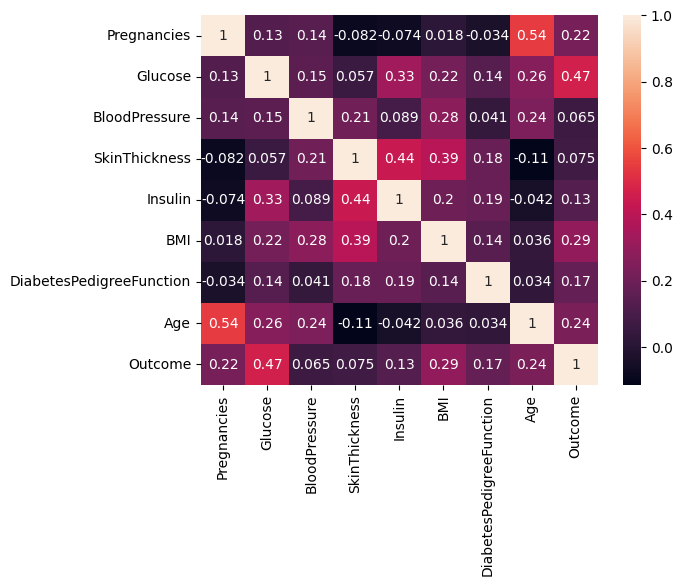

In [12]:
sns.heatmap(df.corr(), annot=True)

In [13]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id="prep"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 4 : Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [56]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [57]:
y = pd.get_dummies(y)

In [16]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [17]:
y

0      1
0    False   True
1     True  False
2    False   True
3     True  False
4    False   True
..     ...    ...
763   True  False
764   True  False
765   True  False
766  False   True
767   True  False

[768 rows x 2 columns]

<a id="norm"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.1 : Normalize</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [58]:
norm = StandardScaler()
X    = norm.fit_transform(X)

In [59]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
with open('standard.pkl', 'wb') as model_file:
    pickle.dump(norm, model_file)

<a id="ttsplit"></a>
## <p style="background-color:#23ff16; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:left; border-radius:200px 200px;">Phase 4.2 : Train, Test Split</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<a id="net"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 5 : Prepare Network</p>

⬆️ [Tabel of Contents](#contents_tabel)

Use XGBoost : 

In [21]:
xgboost = XGBClassifier()
param_gs_xgboost = [{'gamma':[0.1, 0.2, 0.3],
                     'eta':[1e-3, 1e-2],
                     'n_estimators':[50 ,1e2]
                    }]
gs_xgboost = GridSearchCV(estimator=xgboost,
                          param_grid=param_gs_xgboost,
                          scoring='accuracy',
                          cv=3)

gs_XGBoost = gs_xgboost.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
  

In [22]:
print('Best score XGBoost method : {}'.format(gs_XGBoost.best_score_))
print('Best parameters XGBoost method : {}'.format(gs_XGBoost.best_params_))

Best score XGBoost method : 0.7299813780260708
Best parameters XGBoost method : {'eta': 0.01, 'gamma': 0.1, 'n_estimators': 50}


In [23]:
xgboost_model = gs_XGBoost.best_estimator_

In [24]:
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgboost_model, model_file)

Network : 

In [61]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='elu', input_shape=(8,)),
        tf.keras.layers.Dense(20, activation='elu'),
        tf.keras.layers.Dense(30, activation='elu'),
        tf.keras.layers.Dense(20, activation='elu'),
        tf.keras.layers.Dense(17, activation='elu'),
        tf.keras.layers.Dense(15, activation='elu'),
        tf.keras.layers.Dense(10, activation='elu'),
        tf.keras.layers.Dense(15, activation='elu',use_bias=False),
        tf.keras.layers.Dense(8,  activation='elu'),
        tf.keras.layers.Dense(4,  activation='elu'),
        tf.keras.layers.Dense(2,  activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                90        
                                                                 
 dense_11 (Dense)            (None, 20)                220       
                                                                 
 dense_12 (Dense)            (None, 30)                630       
                                                                 
 dense_13 (Dense)            (None, 20)                620       
                                                                 
 dense_14 (Dense)            (None, 15)                315       
                                                                 
 dense_15 (Dense)            (None, 15)                240       
                                                                 
 dense_16 (Dense)            (None, 10)               

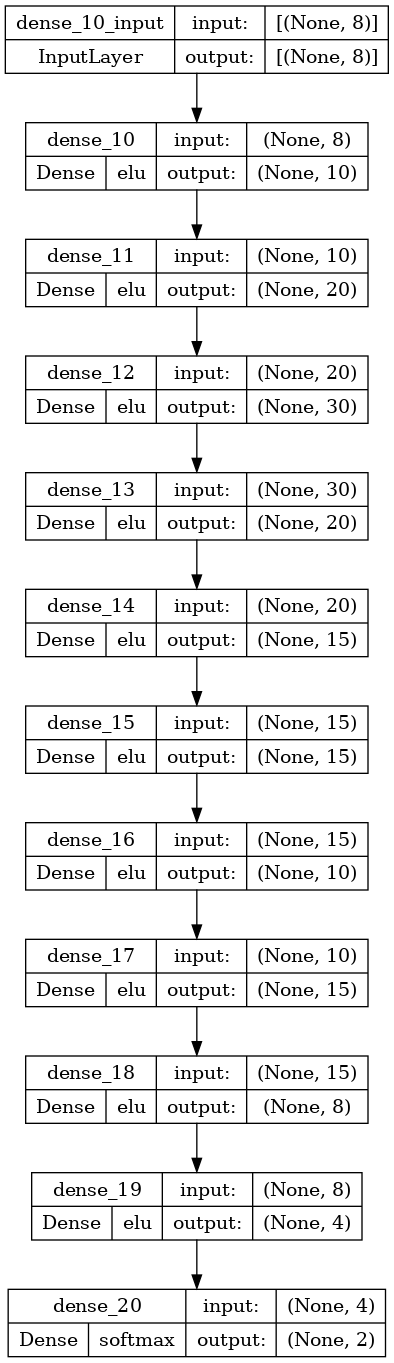

In [34]:
plot_model(model, show_layer_activations=True, show_shapes=True)

<a id="trainobj"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 6 : Prepare Train Objects</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [62]:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=0.01)
LOSS      = tf.keras.losses.CategoricalCrossentropy()
METRICS   = [tf.keras.metrics.CategoricalAccuracy(),
             tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.Precision(name='precision')]

model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=METRICS)

<a id="train"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 7 : Train</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [63]:
model.fit(X_train, y_train,
          epochs=60,
          validation_data=(X_test, y_test),
          batch_size=1,
          workers=2)

Epoch 1/60
537/537 [==============================] - 7s 7ms/step - loss: 0.5593 - categorical_accuracy: 0.7039 - recall: 0.7039 - precision: 0.7039 - val_loss: 0.4866 - val_categorical_accuracy: 0.7576 - val_recall: 0.7576 - val_precision: 0.7576
Epoch 2/60
537/537 [==============================] - 4s 7ms/step - loss: 0.5058 - categorical_accuracy: 0.7430 - recall: 0.7430 - precision: 0.7430 - val_loss: 0.4946 - val_categorical_accuracy: 0.7446 - val_recall: 0.7446 - val_precision: 0.7446
Epoch 3/60
537/537 [==============================] - 4s 7ms/step - loss: 0.5109 - categorical_accuracy: 0.7467 - recall: 0.7467 - precision: 0.7467 - val_loss: 0.4666 - val_categorical_accuracy: 0.7879 - val_recall: 0.7879 - val_precision: 0.7879
Epoch 4/60
537/537 [==============================] - 4s 8ms/step - loss: 0.4924 - categorical_accuracy: 0.7709 - recall: 0.7709 - precision: 0.7709 - val_loss: 0.4911 - val_categorical_accuracy: 0.7359 - val_recall: 0.7359 - val_precision: 0.7359
Epoch 5/

<a id="eval"></a>
# <p style="background-color:#8dff76; padding: 15px; font-family:cursive; color:black; font-size:100%; text-align:center; border-radius:200px 200px;">Phase 8 : Evaluate</p>

⬆️ [Tabel of Contents](#contents_tabel)

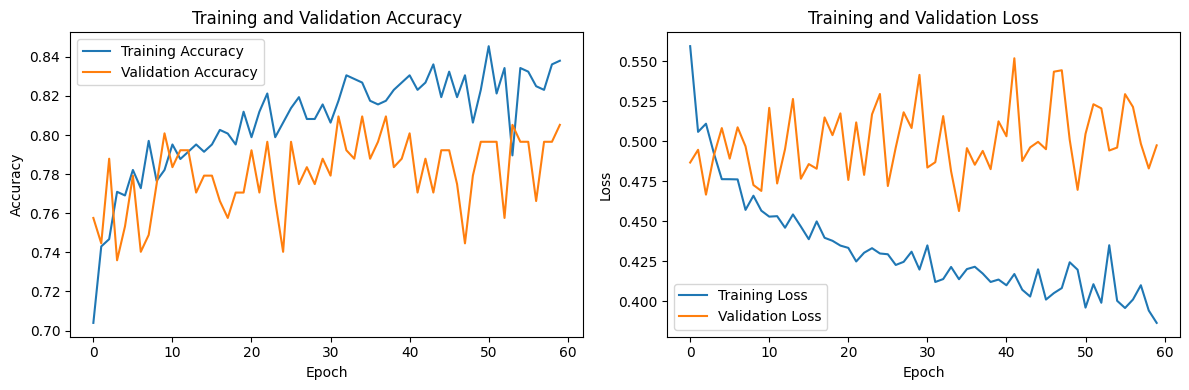

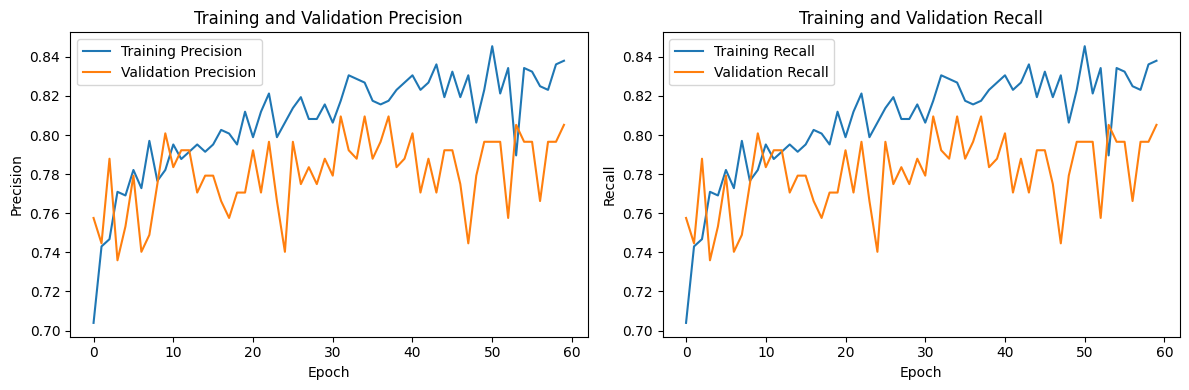

In [66]:
# Access the accuracy and loss values over epochs
accuracy = model.history.history['categorical_accuracy']  # Replace 'accuracy' with 'acc' for older versions of Keras
val_accuracy = model.history.history['val_categorical_accuracy']  # Replace 'val_accuracy' with 'val_acc' for older versions of Keras
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

# If you have precision and recall metrics, you can access them as well
precision = model.history.history['precision']
val_precision = model.history.history['val_precision']
recall = model.history.history['recall']
val_recall = model.history.history['val_recall']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()

# If precision and recall metrics are available, create additional plots
if 'precision' in model.history.history:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(precision, label='Training Precision')
    plt.plot(val_precision, label='Validation Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.title('Training and Validation Precision')
    plt.legend()

if 'recall' in model.history.history:
    plt.subplot(1, 2, 2)
    plt.plot(recall, label='Training Recall')
    plt.plot(val_recall, label='Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.title('Training and Validation Recall')
    plt.legend()

plt.tight_layout()
plt.show()


In [67]:
model.save("ANN_model.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
